In [29]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('kc_house_data.csv')

In [3]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
dataset['date'] = pd.to_datetime(dataset['date'])

In [6]:
dataset['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [7]:
dataset['waterfront'] = dataset['waterfront'].fillna(0)

In [8]:
dataset.dropna(subset = ['view'])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [9]:
dataset['sqft_basement'] = dataset['sqft_basement'].replace('?', np.nan)

In [10]:
dataset['sqft_basement'] = pd.to_numeric(dataset['sqft_basement'])

In [11]:
dataset['yr_renovated'].isna().value_counts()

False    17755
True      3842
Name: yr_renovated, dtype: int64

In [12]:
dataset.yr_renovated.fillna(dataset.yr_built, inplace=True)

In [17]:
dataset['zipcode'] = dataset['zipcode'].apply(str)

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21143 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

In [65]:
mean_price_by_zip = dataset.groupby(['zipcode']).mean()['price']
top_ten_zips_by_mean = mean_price_by_zip.nlargest(10)

Text(0.5, 1.0, 'Ten Zipcodes with the Highest Mean Selling Price')

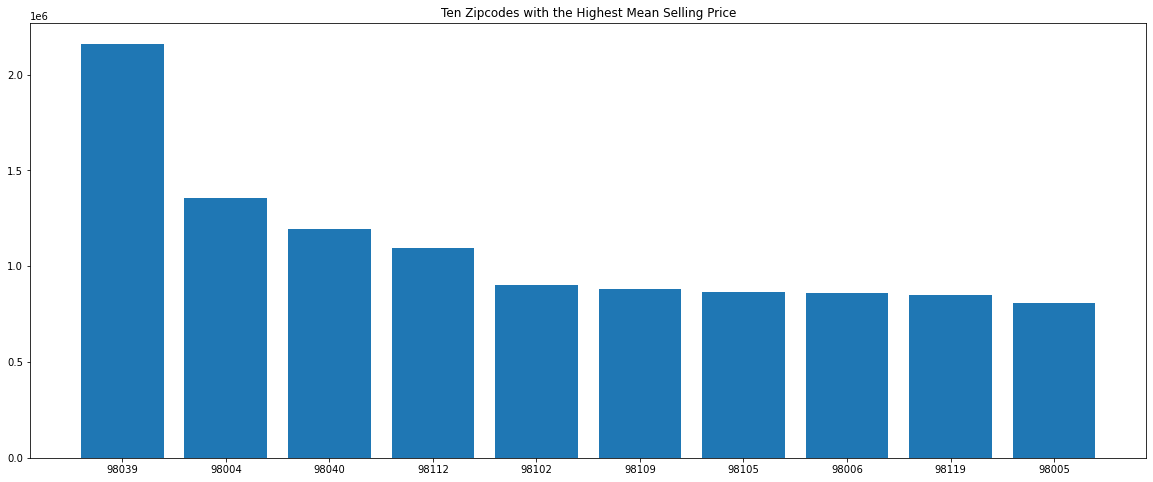

In [67]:
fig, ax = plt.subplots(figsize = (20, 8))

ax.bar(x = top_ten_zips_by_mean.index, height = top_ten_zips_by_mean.values)

ax.set_title('Ten Zipcodes with the Highest Mean Selling Price')

Text(0.5, 1.0, 'Ten Zipcodes with the Lowest Mean Selling Price')

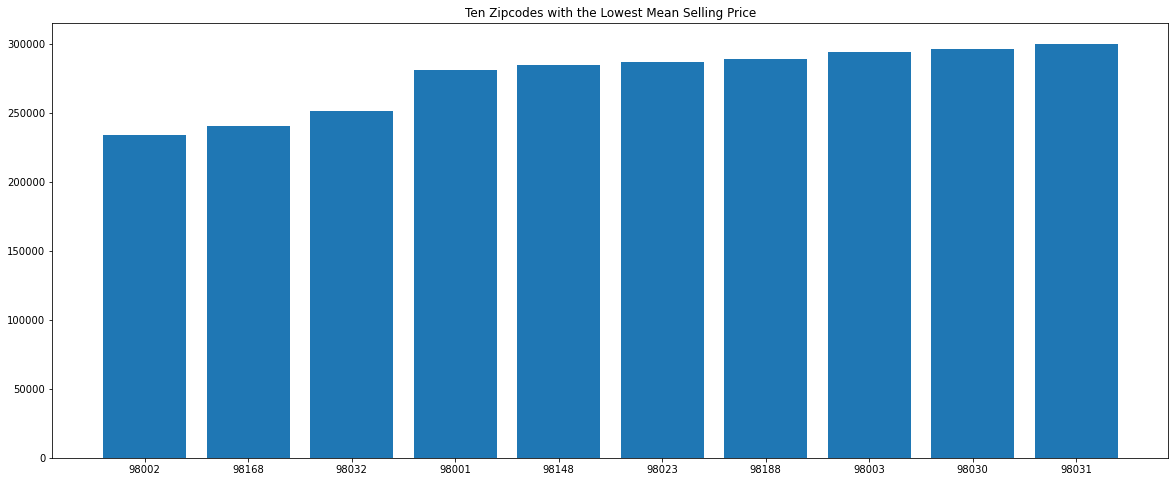

In [69]:
bottom_ten_zips_by_mean = mean_price_by_zip.nsmallest(10)
fig, ax = plt.subplots(figsize = (20, 8))

ax.bar(x = bottom_ten_zips_by_mean.index, height = bottom_ten_zips_by_mean.values)

ax.set_title('Ten Zipcodes with the Lowest Mean Selling Price')

In [19]:
train = dataset
test = dataset

In [20]:
X_train = train.drop('price', axis = 1)
y_train = train['price']
X_test = test.drop('price', axis = 1)
y_test = test['price']

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  float64       
 8   view           21534 non-null  float64       
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21143 non-null  float64       
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  float64       
 15  zipcode        2159

In [28]:
y_train

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 21597, dtype: float64

Text(0.5, 1.0, 'Distribution of House Prices in King County')

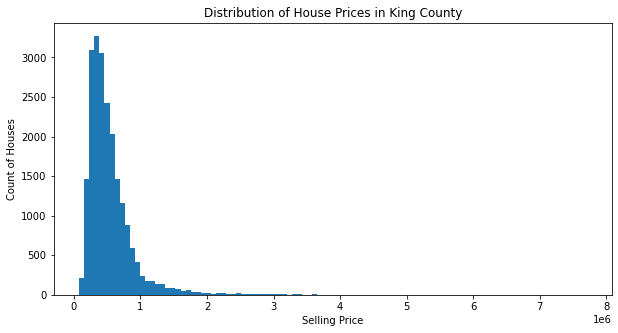

In [26]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.hist(y_train, bins = 100)

ax.set_xlabel('Selling Price')
ax.set_ylabel('Count of Houses')
ax.set_title('Distribution of House Prices in King County')

In [30]:
heatmap_data = pd.concat([y_train, X_train], axis = 1)
corr = heatmap_data.corr()

Text(0.5, 1.0, 'Heatmap of Correlation between Attributes and including Target')

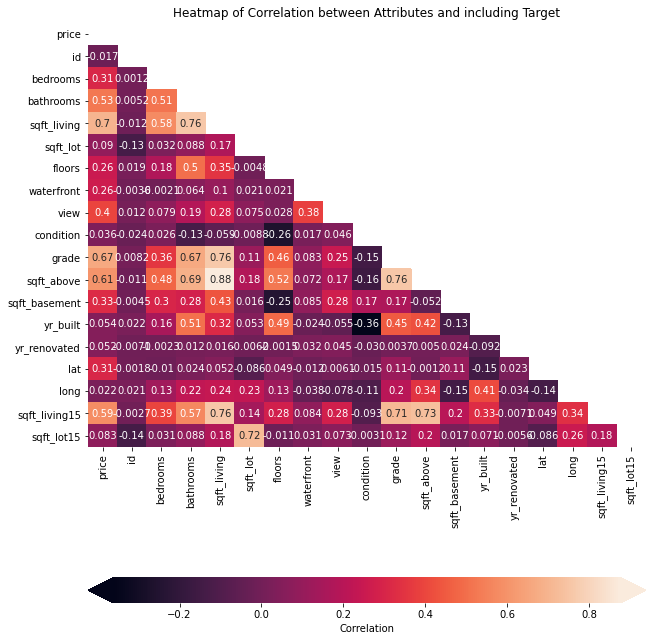

In [35]:
fig, ax = plt.subplots(figsize = (10, 12))

sns.heatmap(
    data=corr,
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

ax.set_title('Heatmap of Correlation between Attributes and including Target')

In [70]:
most_correlated_feature = 'sqft_living'

Text(0.5, 1.0, 'Most Correlated Feature vs. Price')

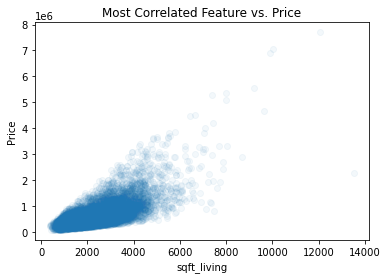

In [72]:
fig, ax = plt.subplots()

ax.scatter(X_train[most_correlated_feature], y_train, alpha = .05)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel('Price')
ax.set_title('Most Correlated Feature vs. Price')

Text(0.5, 1.0, 'Grade vs. Price')

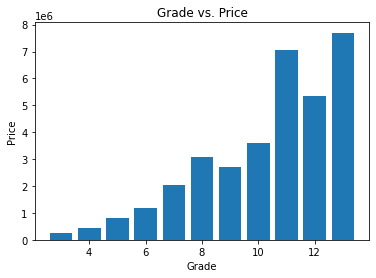

In [83]:
fig, ax = plt.subplots()

ax.bar(dataset['grade'], dataset['price'])
ax.set_xlabel('Grade')
ax.set_ylabel('Price')
ax.set_title('Grade vs. Price')

In [84]:
from sklearn.linear_model import LinearRegression
baseline_model = LinearRegression()

In [85]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits = 3, test_size = 0.25, random_state = 0)

baseline_scores = cross_validate(
        estimator = baseline_model,
        X = X_train[[most_correlated_feature]],
        y = y_train,
        return_train_score = True,
        cv = splitter
)
print('Train score:   ', baseline_scores['train_score'].mean())
print('Validation score:', baseline_scores['test_score'].mean())

Train score:    0.48774659364870426
Validation score: 0.5024006604207555


In [86]:
X_train_numeric = X_train.select_dtypes('number').copy()
X_train_numeric

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,7129300520,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,47.5112,-122.257,1340,5650
1,6414100192,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,47.7210,-122.319,1690,7639
2,5631500400,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,1933.0,47.7379,-122.233,2720,8062
3,2487200875,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,47.5208,-122.393,1360,5000
4,1954400510,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,47.6993,-122.346,1530,1509
21593,6600060120,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,47.5107,-122.362,1830,7200
21594,1523300141,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,47.5944,-122.299,1020,2007
21595,291310100,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,47.5345,-122.069,1410,1287


In [ ]:
scatterplot_data = X_train_numeric.drop('sqft_living', axis = 1)
fig, axes = plt